Distribución de clases en el conjunto de datos:
680    5
520    5
630    4
750    4
625    4
      ..
685    1
470    1
740    1
835    1
840    1
Name: count, Length: 121, dtype: int64
Matriz de Confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         278       1.00      0.00      0.00       1.0
         315       0.00      1.00      0.00       0.0
         325       1.00      0.00      0.00       1.0
         342       0.00      1.00      0.00       0.0
         345       0.00      1.00      0.00       0.0
         352       1.00      0.00      0.00       1.0
         355       0.00      1.00      0.00       0.0
         365       0.00      1.00      0.00       0.0
         378       0.00      1.00      0.00       0.0
         380       1.00      0.00      0.00       1.0
         392       0.00      1.00      0.00       0

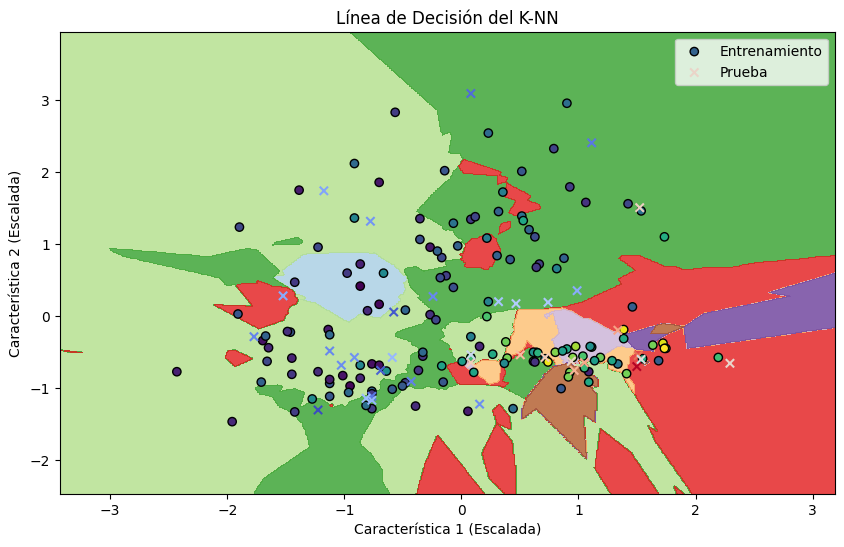

In [1]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Cargar el conjunto de datos (Wine Dataset)
url = "https://raw.githubusercontent.com/Piyush-Bhardwaj/Wine-classification-using-KNN-and-SVM-classifier/master/wine_data.csv"
dataset = pd.read_csv(url)

# Verificar la distribución de clases
print("Distribución de clases en el conjunto de datos:")
print(pd.Series(dataset.iloc[:, -1].values).value_counts())

# Seleccionar características independientes y la variable dependiente
X = dataset.iloc[:, 1:3].values  # Usamos solo las primeras dos características para graficar
y = dataset.iloc[:, -1].values   # La última columna como etiqueta (Clase)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el modelo K-NN
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Usando 5 vecinos
knn_classifier.fit(X_train, y_train)

# Predecir los resultados para el conjunto de prueba
y_pred = knn_classifier.predict(X_test)

# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Reporte de clasificación con manejo de zero_division
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, zero_division=1))

# Visualización de la línea de decisión
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predicción para cada punto del grid
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la línea de decisión
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', label="Entrenamiento")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', cmap=plt.cm.coolwarm, label="Prueba")
plt.title("Línea de Decisión del K-NN")
plt.xlabel("Característica 1 (Escalada)")
plt.ylabel("Característica 2 (Escalada)")
plt.legend()
plt.show()
